In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

x=[11003.61,11108.61,11133.33,11155.83,11183.33,11297.50,
   11310.28,11416.67,11423.89,11438.33,11461.11,11485.56,
   11503.06,11511.39,11522.22,11569.44,11583.33,11595.00,
   11600.00,11690.56,11715.83,11751.11,11770.28,11785.28,
   11822.78,11846.94,11963.06,11973.06,12058.33,12149.44,
   12286.94,12300.00,12355.83,12363.33,12372.78,12386.67,
   12421.67,12645.00]
y=[42102.50,42373.89,42885.83,42712.50,42933.33,42853.33,
   42929.44,42983.33,43000.28,42057.22,43252.78,43187.22,
   42855.28,42106.39,42841.94,43136.67,43150.00,43148.06,
   43150.00,42686.67,41836.11,42814.44,42651.94,42884.44,
   42673.61,42660.56,43290.56,43026.11,42195.56,42477.50,
   43355.56,42433.33,43156.39,43189.17,42711.39,43334.72,
   42895.56,42973.33]

In [3]:
ncity = len(x)
city_distance = np.zeros((ncity, ncity), dtype=np.float64)
for i in range(0, ncity):
    for j in range(i + 1, ncity):
        city_distance[i][j] = math.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)
        city_distance[j][i] = city_distance[i][j]

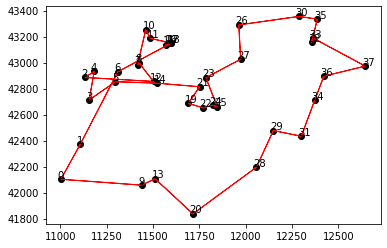

In [4]:
path_list = []
with open('out.txt', 'r') as file:
    for line in file:
        path_list.append(list(map(int, line.split())))

best_route = path_list[-1]
best_route.append(best_route[0])

plt.scatter(x, y, color="black")
for i in range(ncity):
   cur_idx = best_route[i]
   next_idx = best_route[i+1]
   plt.annotate(cur_idx, (x[cur_idx] - 18, y[cur_idx] + 10), size=10)
   plt.arrow(x[cur_idx], y[cur_idx], x[next_idx] - x[cur_idx], y[next_idx] -
            y[cur_idx], head_width=8, width=1, color="r", length_includes_head=True)

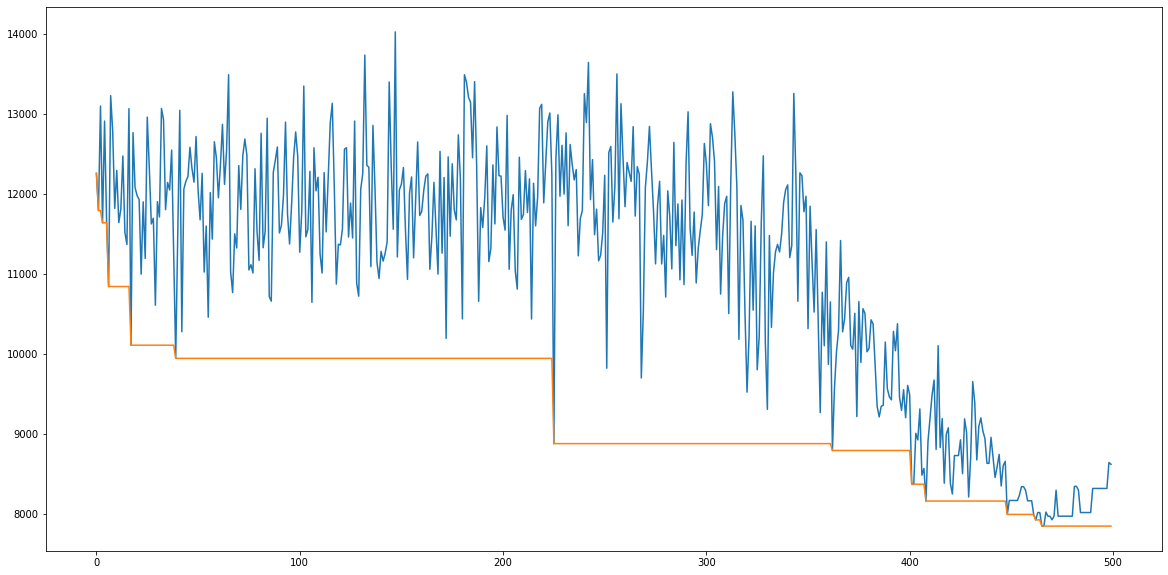

In [5]:
distance_tsp_logs = []
best_distance_tsp_logs = []
with open('log.txt', 'r') as file:
    for line in file:
        best = float(line.split()[0])
        min = float(line.split()[1])
        best_distance_tsp_logs.append(best)
        distance_tsp_logs.append(min)

plt.figure(figsize=(20,10))
plt.plot(distance_tsp_logs)
plt.plot(best_distance_tsp_logs)